In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import locale
locale.setlocale(locale.LC_ALL, 'en_US')
plt.style.use('seaborn')

In [5]:
path=r'C:\Users\mkepa\Downloads\ds_salaries.csv'
data=pd.read_csv(path)

In [6]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000.0,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000.0,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000.0,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000.0,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000.0,USD,150000,US,50,US,L


In [7]:
data.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                5
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
data[data['salary'].isna()]

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
5,5,2020,EN,FT,Data Analyst,NaN,USD,72000,US,100,US,L
15,15,2020,MI,FT,Data Analyst,NaN,USD,8000,PK,50,PK,L
23,23,2020,MI,FT,BI Data Analyst,NaN,USD,98000,US,0,US,M
50,50,2020,EN,FT,Data Analyst,NaN,INR,6072,IN,0,IN,S
51,51,2020,EN,FT,Data Analyst,NaN,USD,91000,US,100,US,L


In [9]:
avg=data[data['job_title']=='Data Analyst']['salary'].mean()

In [10]:
data['salary'].replace(to_replace=np.nan, value=avg, inplace=True)

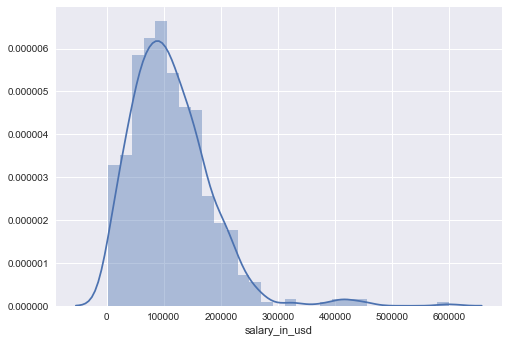

In [11]:
sns.distplot(data['salary_in_usd'],kde=True)

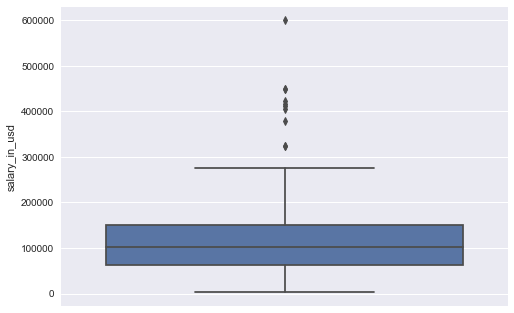

In [17]:
sns.boxplot(data=data, y=data['salary_in_usd'])

In [21]:
def removing_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    low=Q1-(1.5*IQR)
    high=Q3+(1.5*IQR)
    return low,high

In [22]:
low,high=removing_outlier(data['salary_in_usd'])

In [23]:
data['salary_in_usd']=np.where(data['salary_in_usd']>high,high,data['salary_in_usd'])

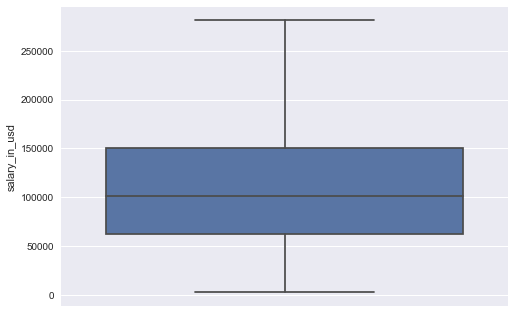

In [24]:
sns.boxplot(data=data, y=data['salary_in_usd'])

In [9]:
data_cat=data.select_dtypes(include='object').columns
data_cat=data_cat.drop(['employee_residence','job_title','salary_currency','company_location'])


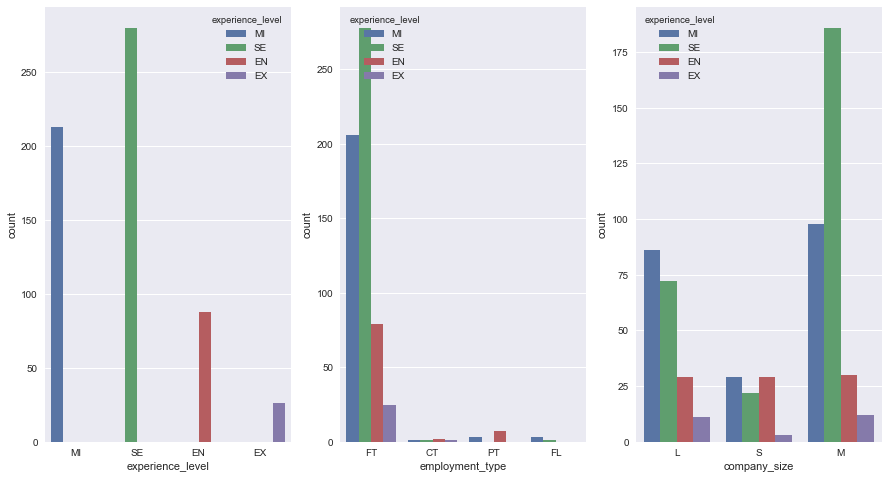

In [10]:
fig=plt.figure(figsize=(15,8))
for i,var in enumerate(data_cat):
    ax=plt.subplot(1,3,i+1)
    sns.countplot(x=data[var],ax=ax, hue=data['experience_level'])
    

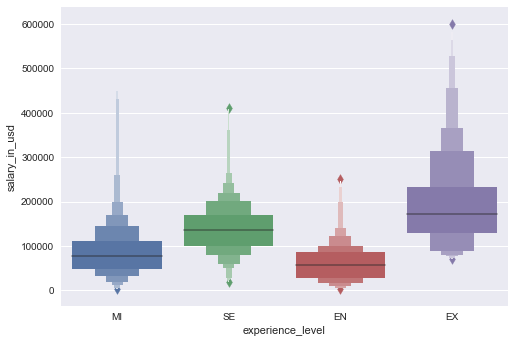

In [76]:
sns.boxenplot(data=data,x='experience_level', y='salary_in_usd')

In [15]:
job_title=data[data['job_title'].isin(['Data Scientist','Machine Learning Engineer','Data Analyst','Data Engineer'])]

In [16]:
groupeddata=job_title[['job_title','work_year','salary_in_usd']].groupby(by=['job_title','work_year']).mean().values

In [17]:
groupeddata=pd.DataFrame(data=groupeddata.reshape(4,3), index=['Data Analyst','Data Engineer','Data Scientist','Machine Learning Engineer'], columns=list(range(2020,2023)))

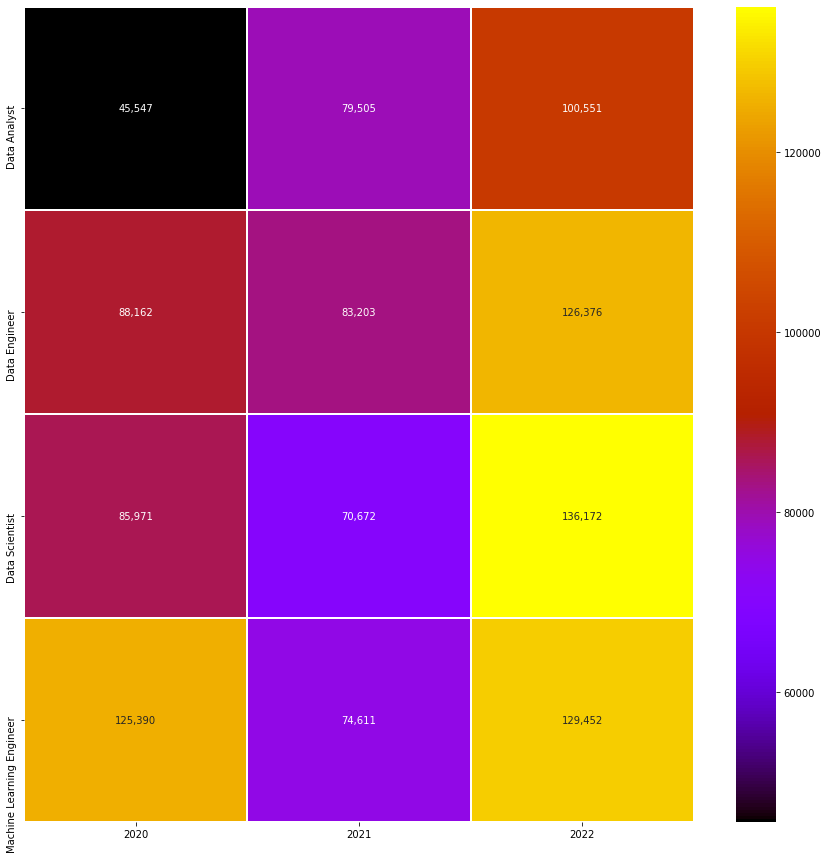

In [36]:
plt.figure(figsize=(15,15))
sns.heatmap(groupeddata,annot=True,fmt=',.0f',cmap='gnuplot',linewidths=1)

In [63]:
Data_scientist=pd.DataFrame(data=data[data['job_title']=='Data Scientist'])
Data_scientist.reset_index(inplace=True)
Data_scientist.drop(['Unnamed: 0','index'],axis=1,inplace=True)

In [73]:
DE=pd.DataFrame(data=data[data['job_title']=='Data Engineer'])
DE.reset_index(inplace=True)
DE.drop(['Unnamed: 0','index'],axis=1,inplace=True)

Text(0.5, 1.0, 'Data Scientist vs Data Engineer salaries 2020-2022')

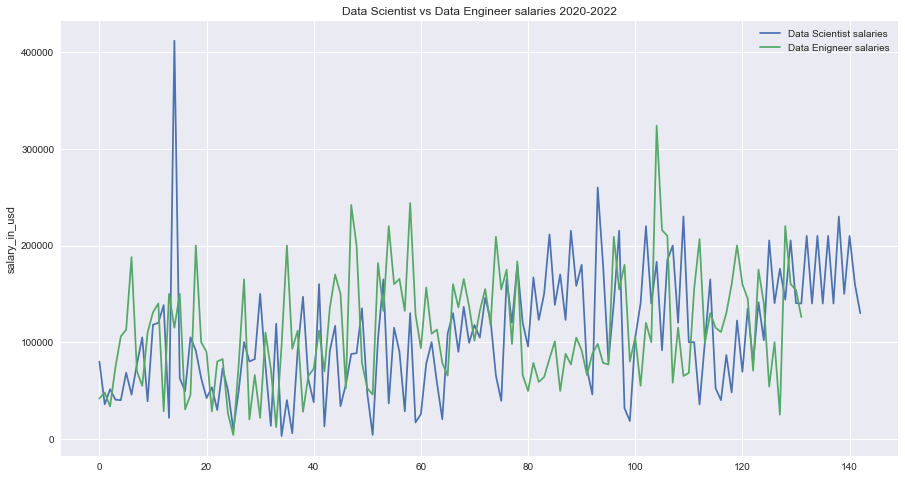

In [75]:
fig=plt.figure(figsize=(15,8))
sns.lineplot(data=Data_scientist,x=Data_scientist.index,y=Data_scientist['salary_in_usd'],label='Data Scientist salaries')
sns.lineplot(data=DE,x=DE.index,y=DE['salary_in_usd'],label='Data Enigneer salaries')
plt.title('Data Scientist vs Data Engineer salaries 2020-2022')

In [12]:
sorted_data=data.sort_values(by='salary_in_usd',ascending=False)[['job_title','salary_in_usd']]

In [13]:
sorted_data=sorted_data.iloc[0:10,:]
    

In [14]:
sorted_data.reset_index(inplace=True)
sorted_data.drop('index',inplace=True, axis=1)

In [15]:
print("Top {} jobs with highest salaries:\n{}".format(len(sorted_data), sorted_data))

Top 10 jobs with highest salaries:
                            job_title  salary_in_usd
0             Principal Data Engineer         600000
1              Financial Data Analyst         450000
2                  Research Scientist         450000
3  Applied Machine Learning Scientist         423000
4            Principal Data Scientist         416000
5                      Data Scientist         412000
6                 Data Analytics Lead         405000
7              Applied Data Scientist         380000
8            Director of Data Science         325000
9                       Data Engineer         324000


In [ ]:
'zrobic usuwanie obserwacji odstajacych na poczatku dla salaries in USD'